In [13]:
from pathlib import Path

folders = list((Path.cwd() / "results" / "symbolic" / "kidera").glob("*"))
#folders = list((Path.cwd() / "results" / "sceptr" / "eval").glob("*"))
#folders = list((Path.cwd() / "results" / "tcr-bert" / "l2").glob("*"))

rolling_window = 20
endofepoch = False
avoid_premature = 10

In [14]:
import matplotlib.pyplot as plt
from utils.retrieve_stats import *
import numpy as np

results = [getstats(i, rolling_window=rolling_window, endofepoch=endofepoch) for i in folders]
bestepochs = [find_bestepoch(i, avoid_premature=avoid_premature) for i in results]
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams["figure.autolayout"] = True

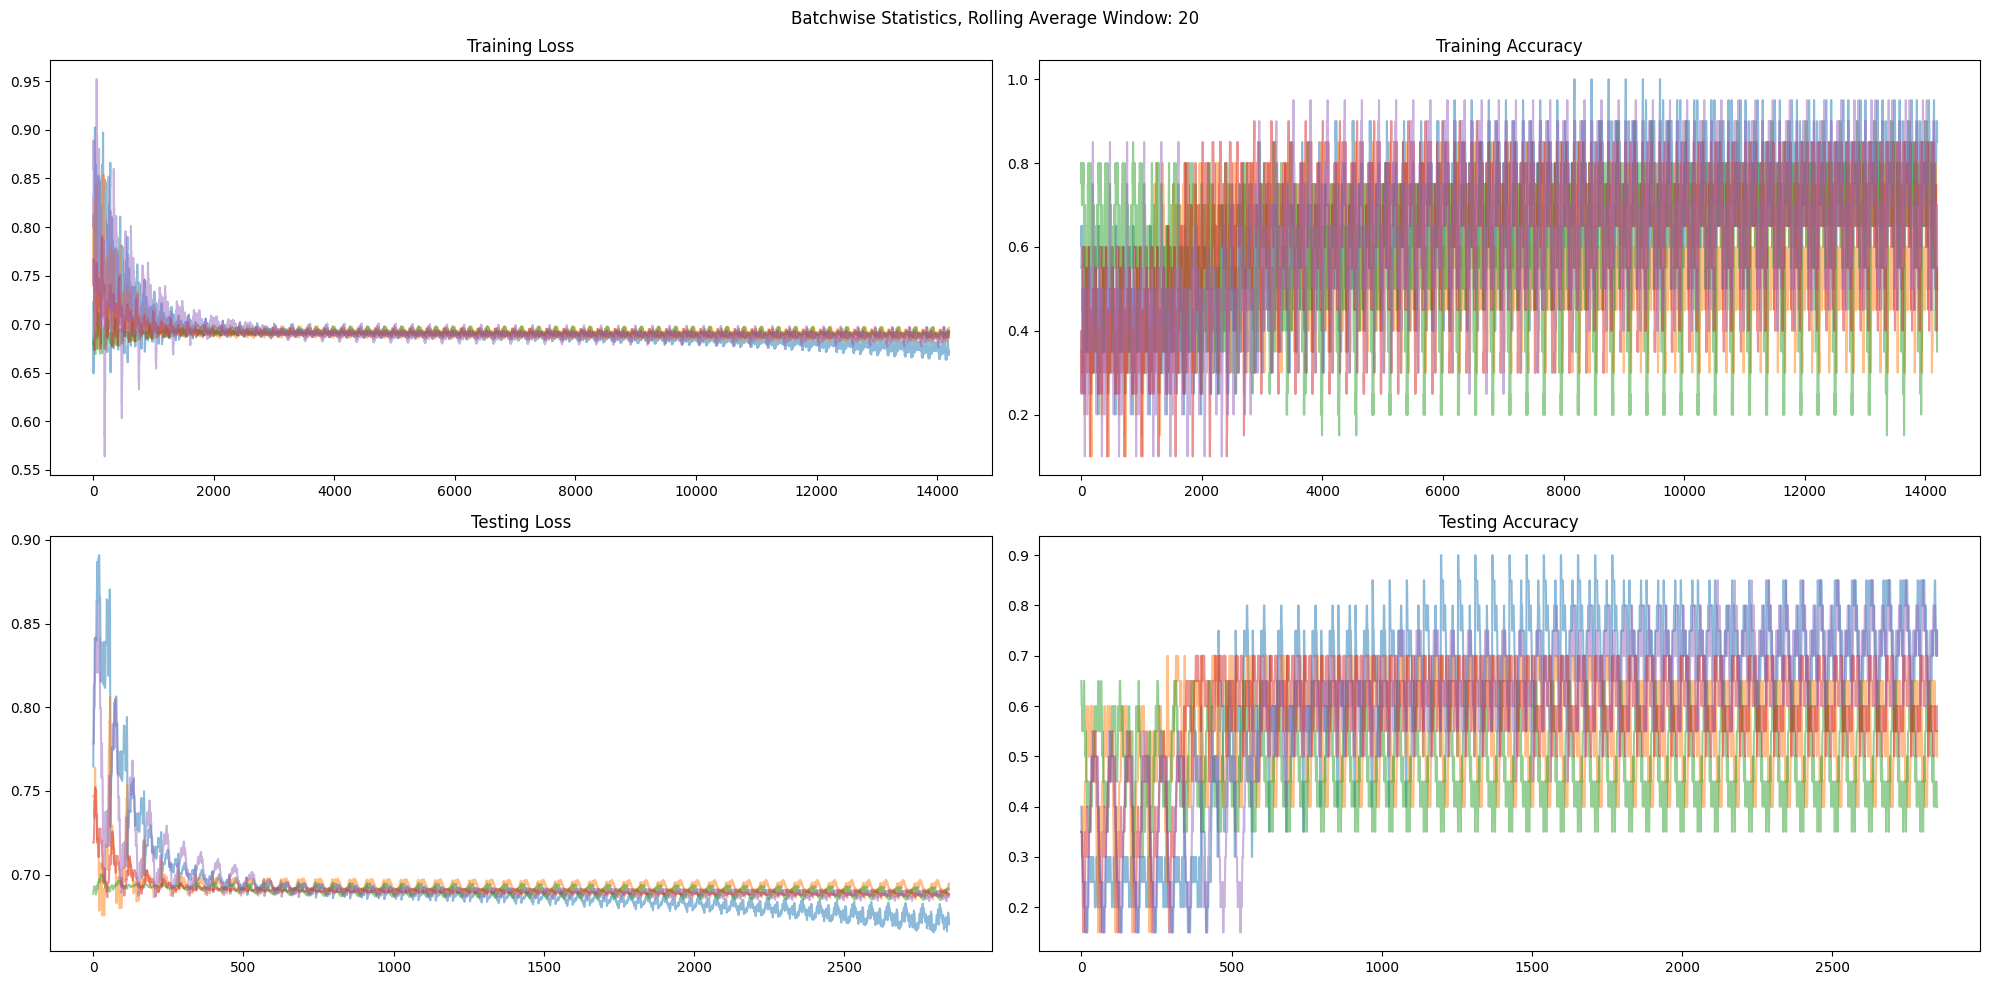

In [15]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)

avg_results = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}

for stats in results:
    axs[0, 0].plot(stats['stats']["train-loss.csv"], alpha = 0.5)
    axs[0, 0].set_title("Training Loss")
    avg_results["train-loss.csv"].append(np.array(stats['stats']["train-loss.csv"]))

    axs[1, 0].plot(stats['stats']["test-loss.csv"], alpha = 0.5)
    axs[1, 0].set_title("Testing Loss")
    avg_results["test-loss.csv"].append(np.array(stats['stats']["test-loss.csv"]))

    axs[0, 1].plot(stats['stats']["train-acc.csv"], alpha = 0.5)
    axs[0, 1].set_title("Training Accuracy")
    avg_results["train-acc.csv"].append(np.array(stats['stats']["train-acc.csv"]))

    axs[1, 1].plot(stats['stats']["test-acc.csv"], alpha = 0.5)
    axs[1, 1].set_title("Testing Accuracy")
    avg_results["test-acc.csv"].append(np.array(stats['stats']["test-acc.csv"]))

fig.suptitle(f"Batchwise Statistics, Rolling Average Window: {rolling_window}")
plt.show()

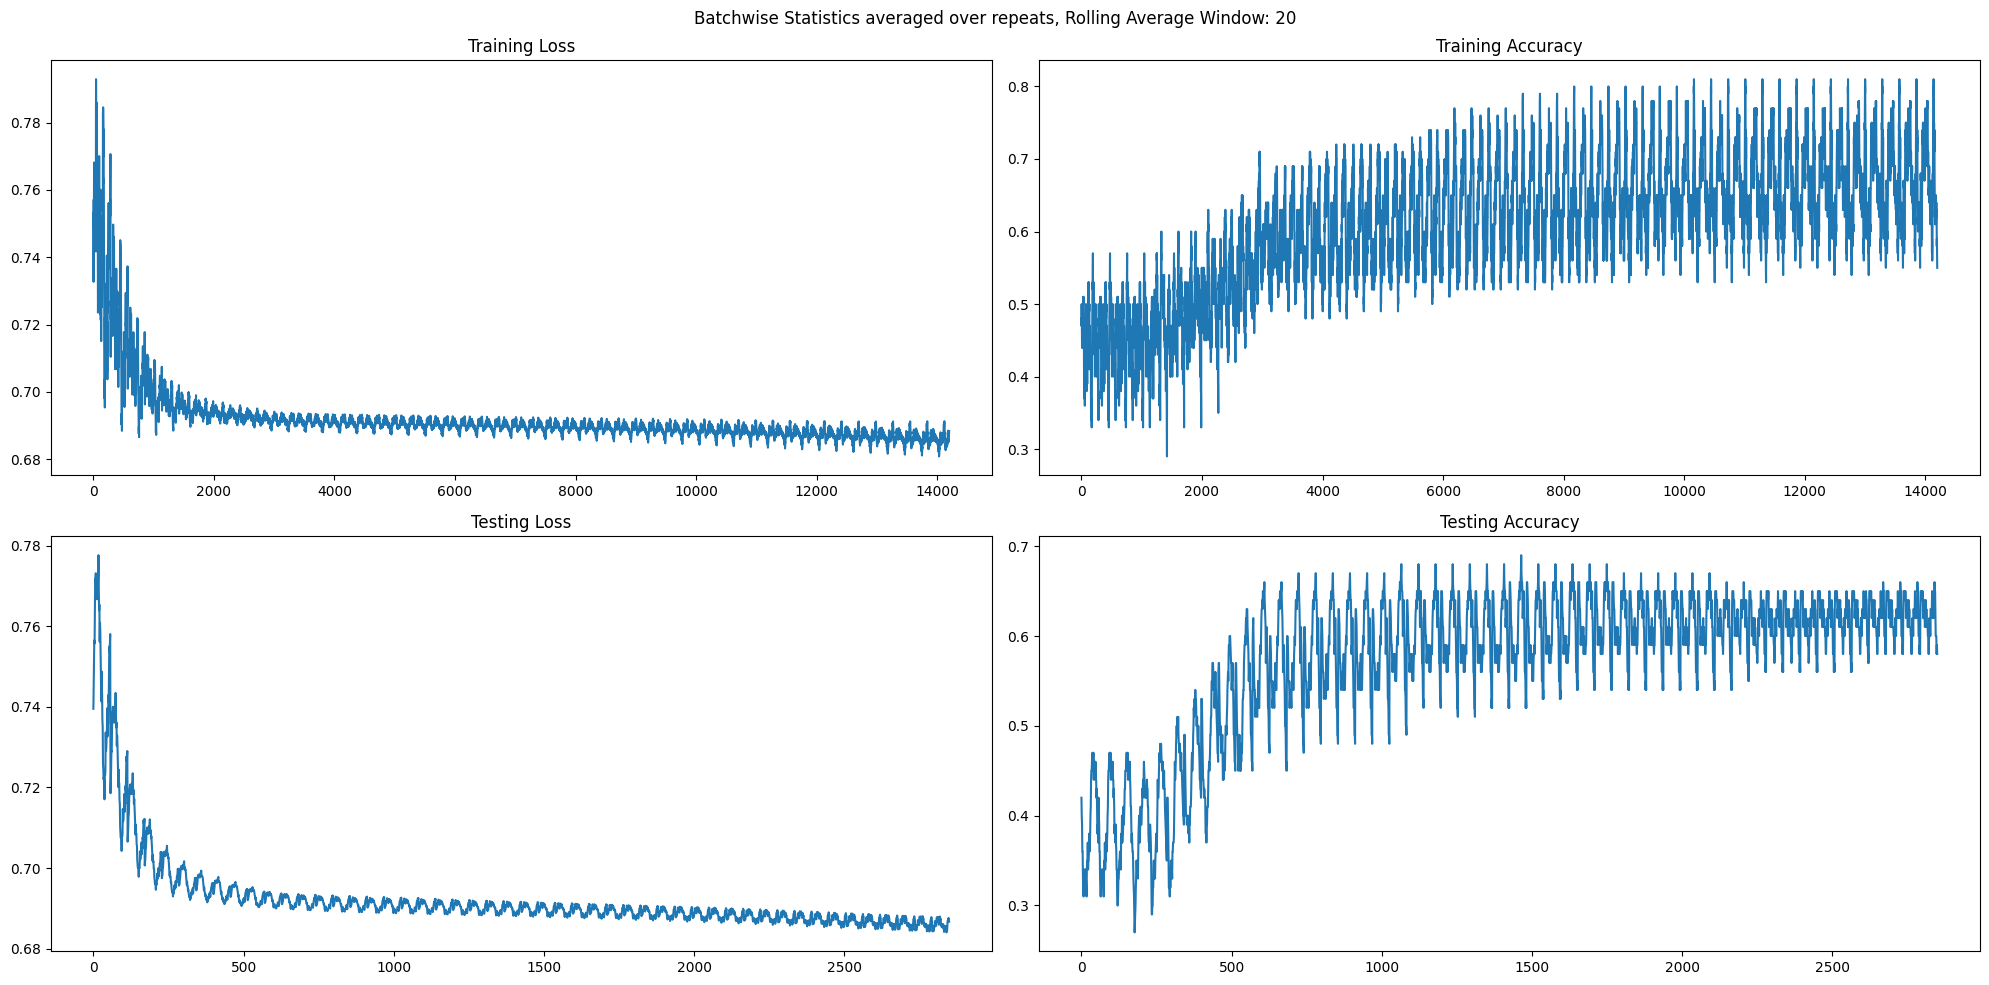

In [16]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)

for key in avg_results.keys():
    maxlen = max(len(i) for i in avg_results[key])
    padded_arrs = np.array([np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan) for arr in avg_results[key]])
    avg_results[key] = np.mean(padded_arrs, axis = 0)

axs[0, 0].plot(avg_results["train-loss.csv"])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(avg_results["test-loss.csv"])
axs[1, 0].set_title("Testing Loss")
axs[0, 1].plot(avg_results["train-acc.csv"])
axs[0, 1].set_title("Training Accuracy")
axs[1, 1].plot(avg_results["test-acc.csv"])
axs[1, 1].set_title("Testing Accuracy")

fig.suptitle(f"Batchwise Statistics averaged over repeats, Rolling Average Window: {rolling_window}")
plt.show()

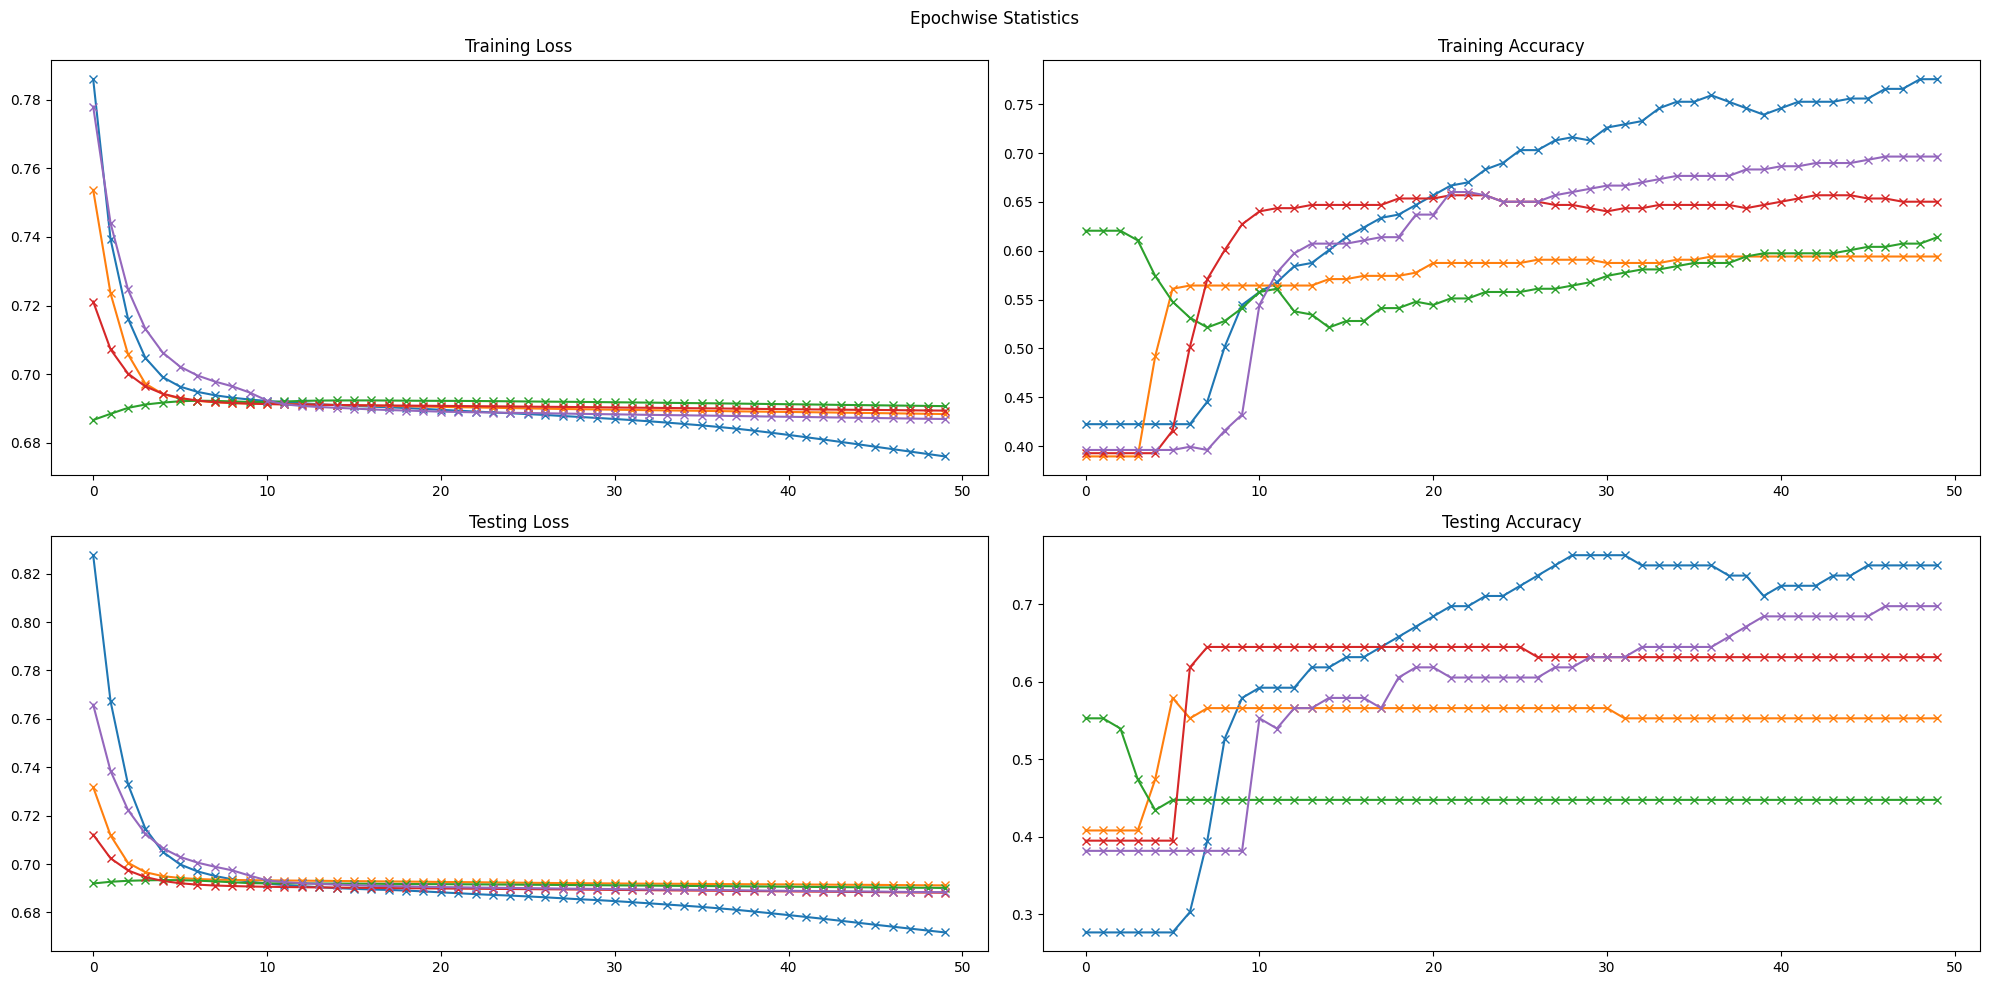

In [17]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)
avg_results = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}
best_loss = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}

for i, stats, beste in zip(list(range(len(results))), results, bestepochs):
    axs[0, 0].plot(stats['epochwisestats']["train-loss.csv"], marker = "x")
    #axs[0, 0].axvline(beste, c = f"C{i}")
    axs[0, 0].set_title("Training Loss")
    avg_results["train-loss.csv"].append(np.array(stats['epochwisestats']["train-loss.csv"]))
    best_loss["train-loss.csv"].append(stats['epochwisestats']["train-loss.csv"][beste])

    axs[1, 0].plot(stats['epochwisestats']["test-loss.csv"], marker = "x")
    #axs[1, 0].axvline(beste, c = f"C{i}")
    axs[1, 0].set_title("Testing Loss")
    avg_results["test-loss.csv"].append(np.array(stats['epochwisestats']["test-loss.csv"]))
    best_loss["test-loss.csv"].append(stats['epochwisestats']["test-loss.csv"][beste])

    axs[0, 1].plot(stats['epochwisestats']["train-acc.csv"], marker = "x")
    #axs[0, 1].axvline(beste, c = f"C{i}")
    axs[0, 1].set_title("Training Accuracy")
    avg_results["train-acc.csv"].append(np.array(stats['epochwisestats']["train-acc.csv"]))
    best_loss["train-acc.csv"].append(stats['epochwisestats']["train-acc.csv"][beste])

    axs[1, 1].plot(stats['epochwisestats']["test-acc.csv"], marker = "x")
    #axs[1, 1].axvline(beste, c = f"C{i}")
    axs[1, 1].set_title("Testing Accuracy")
    avg_results["test-acc.csv"].append(np.array(stats['epochwisestats']["test-acc.csv"]))
    best_loss["test-acc.csv"].append(stats['epochwisestats']["test-acc.csv"][beste])

fig.suptitle(f"Epochwise Statistics")
plt.show()

In [18]:
for key, item in best_loss.items():
    print (f"{key}: {round(np.min(item), 3)} - {round(np.max(item), 3)} ($\mu$: {round(np.mean(item), 3)})")

train-acc.csv: 0.594 - 0.776 ($\mu$: 0.666)
train-loss.csv: 0.676 - 0.691 ($\mu$: 0.686)
test-acc.csv: 0.447 - 0.75 ($\mu$: 0.613)
test-loss.csv: 0.672 - 0.691 ($\mu$: 0.686)


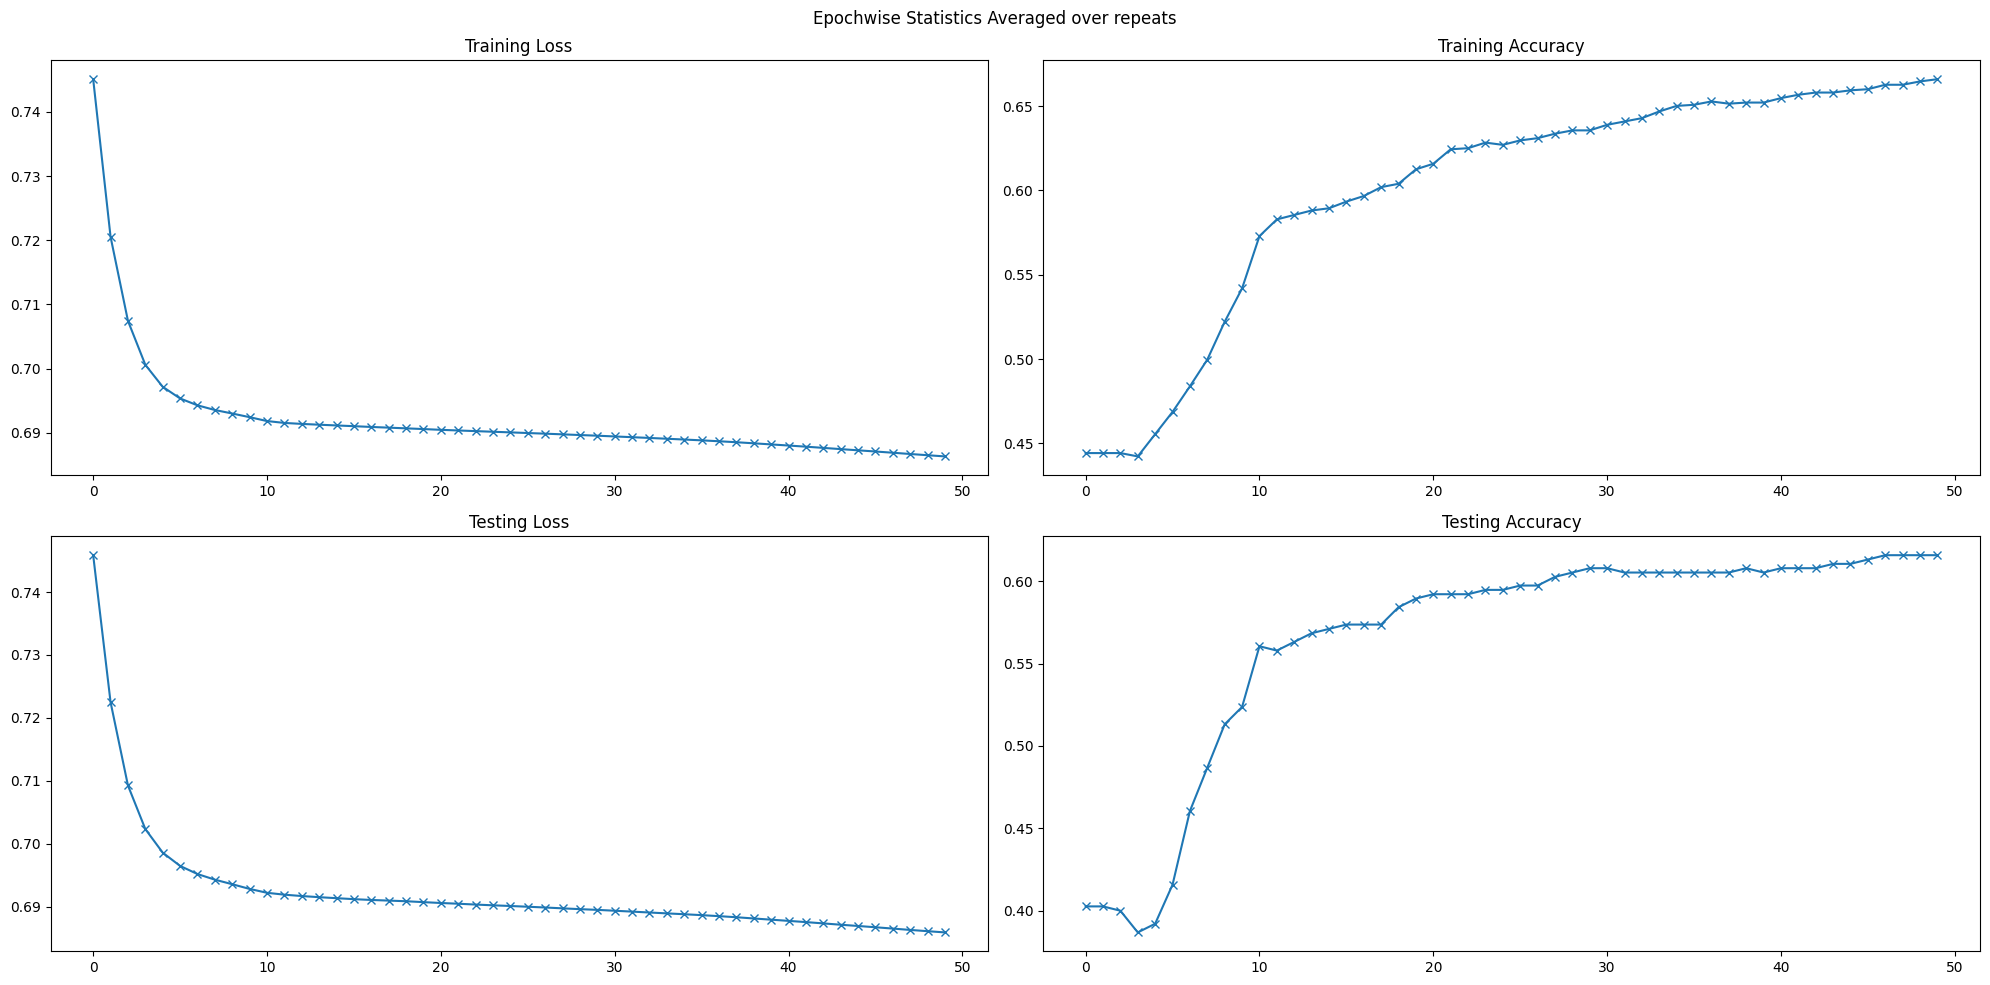

In [19]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)

for key in avg_results.keys():
    maxlen = max(len(i) for i in avg_results[key])
    padded_arrs = np.array([np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan) for arr in avg_results[key]])
    avg_results[key] = np.nanmean(padded_arrs, axis = 0)

axs[0, 0].plot(avg_results["train-loss.csv"], marker = "x")
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(avg_results["test-loss.csv"], marker = "x")
axs[1, 0].set_title("Testing Loss")
axs[0, 1].plot(avg_results["train-acc.csv"], marker = "x")
axs[0, 1].set_title("Training Accuracy")
axs[1, 1].plot(avg_results["test-acc.csv"], marker = "x")
axs[1, 1].set_title("Testing Accuracy")

fig.suptitle(f"Epochwise Statistics Averaged over repeats")
plt.show()

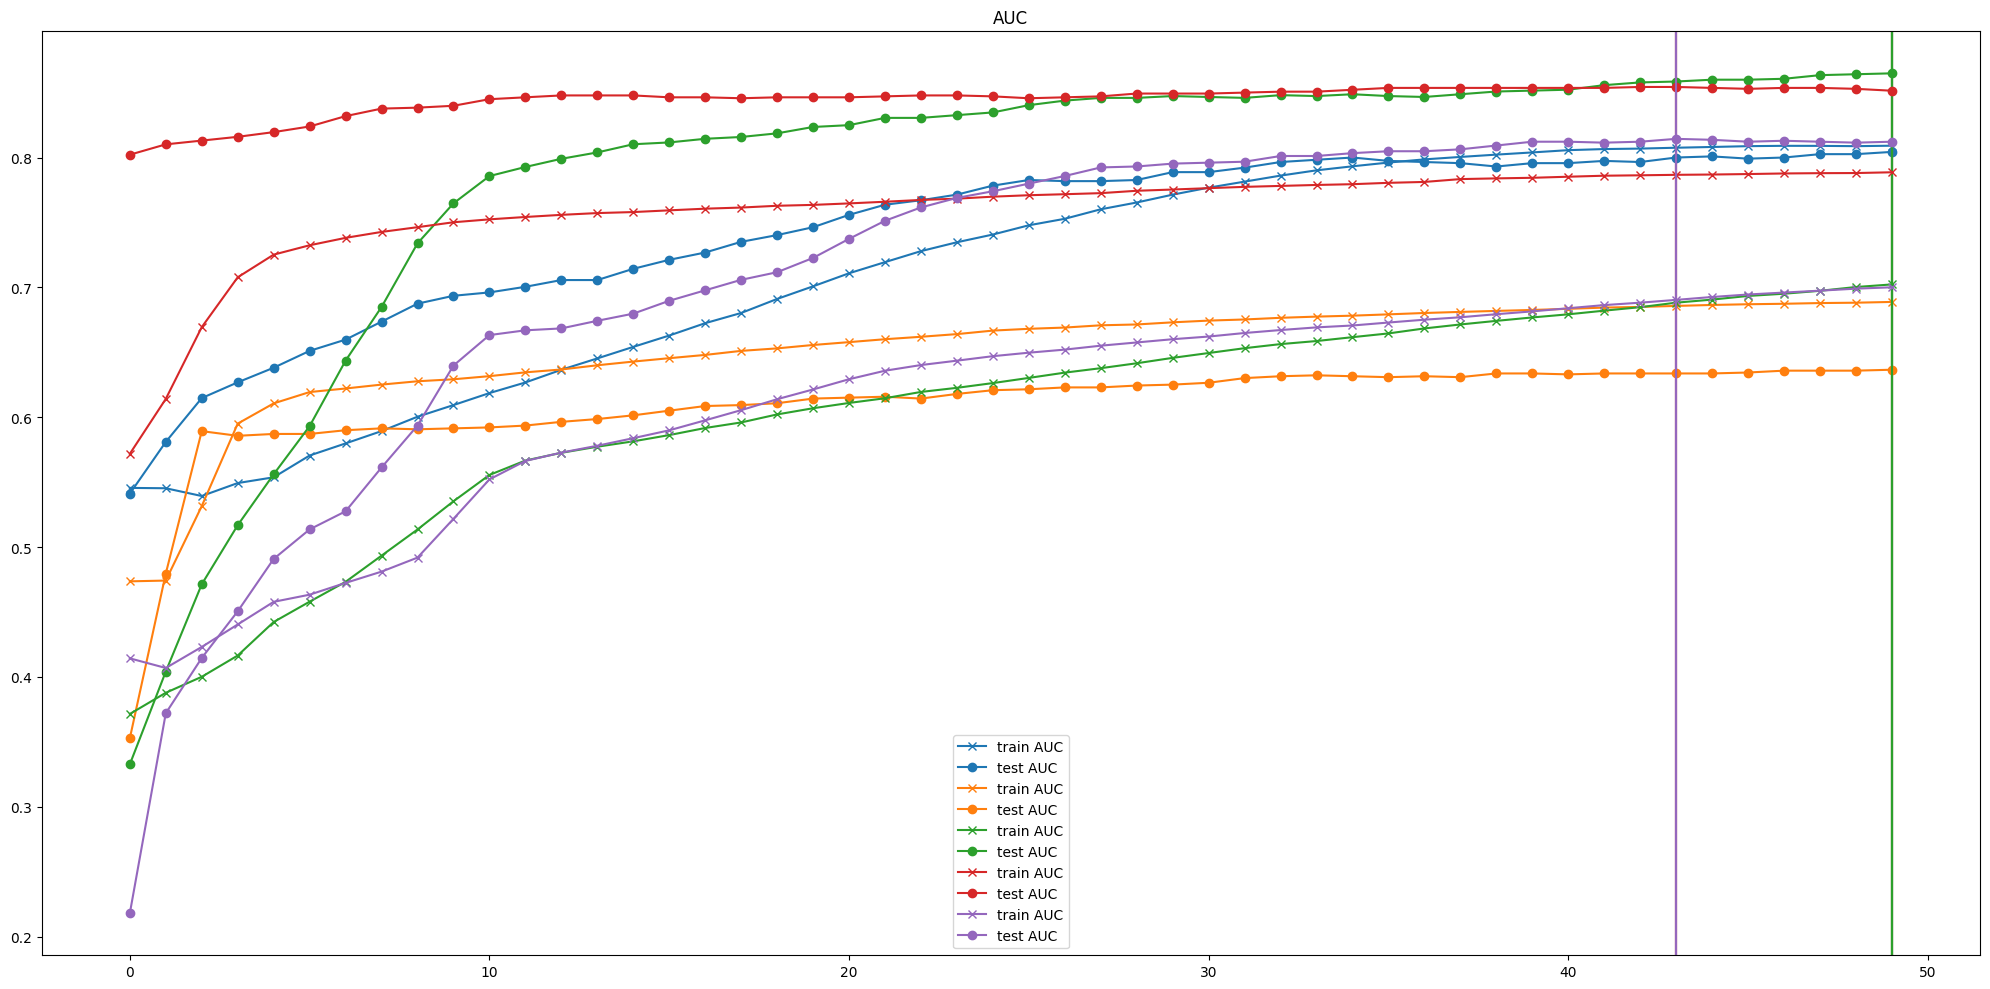

In [20]:
avg_results = {"train": [], "test": []}

for i, stats in enumerate(results):
    for key, val in stats['aucstats'].items():
        t = key.replace(".csv", "").split("-")[0]
        plt.plot(val, label = f"{t} AUC", marker = "x" if t == "train" else "o", c = f"C{i}")
        plt.axvline(bestepochs[i], c = f"C{i}")
        avg_results[t].append(np.array(val))

plt.title("AUC")
plt.legend()
plt.show()

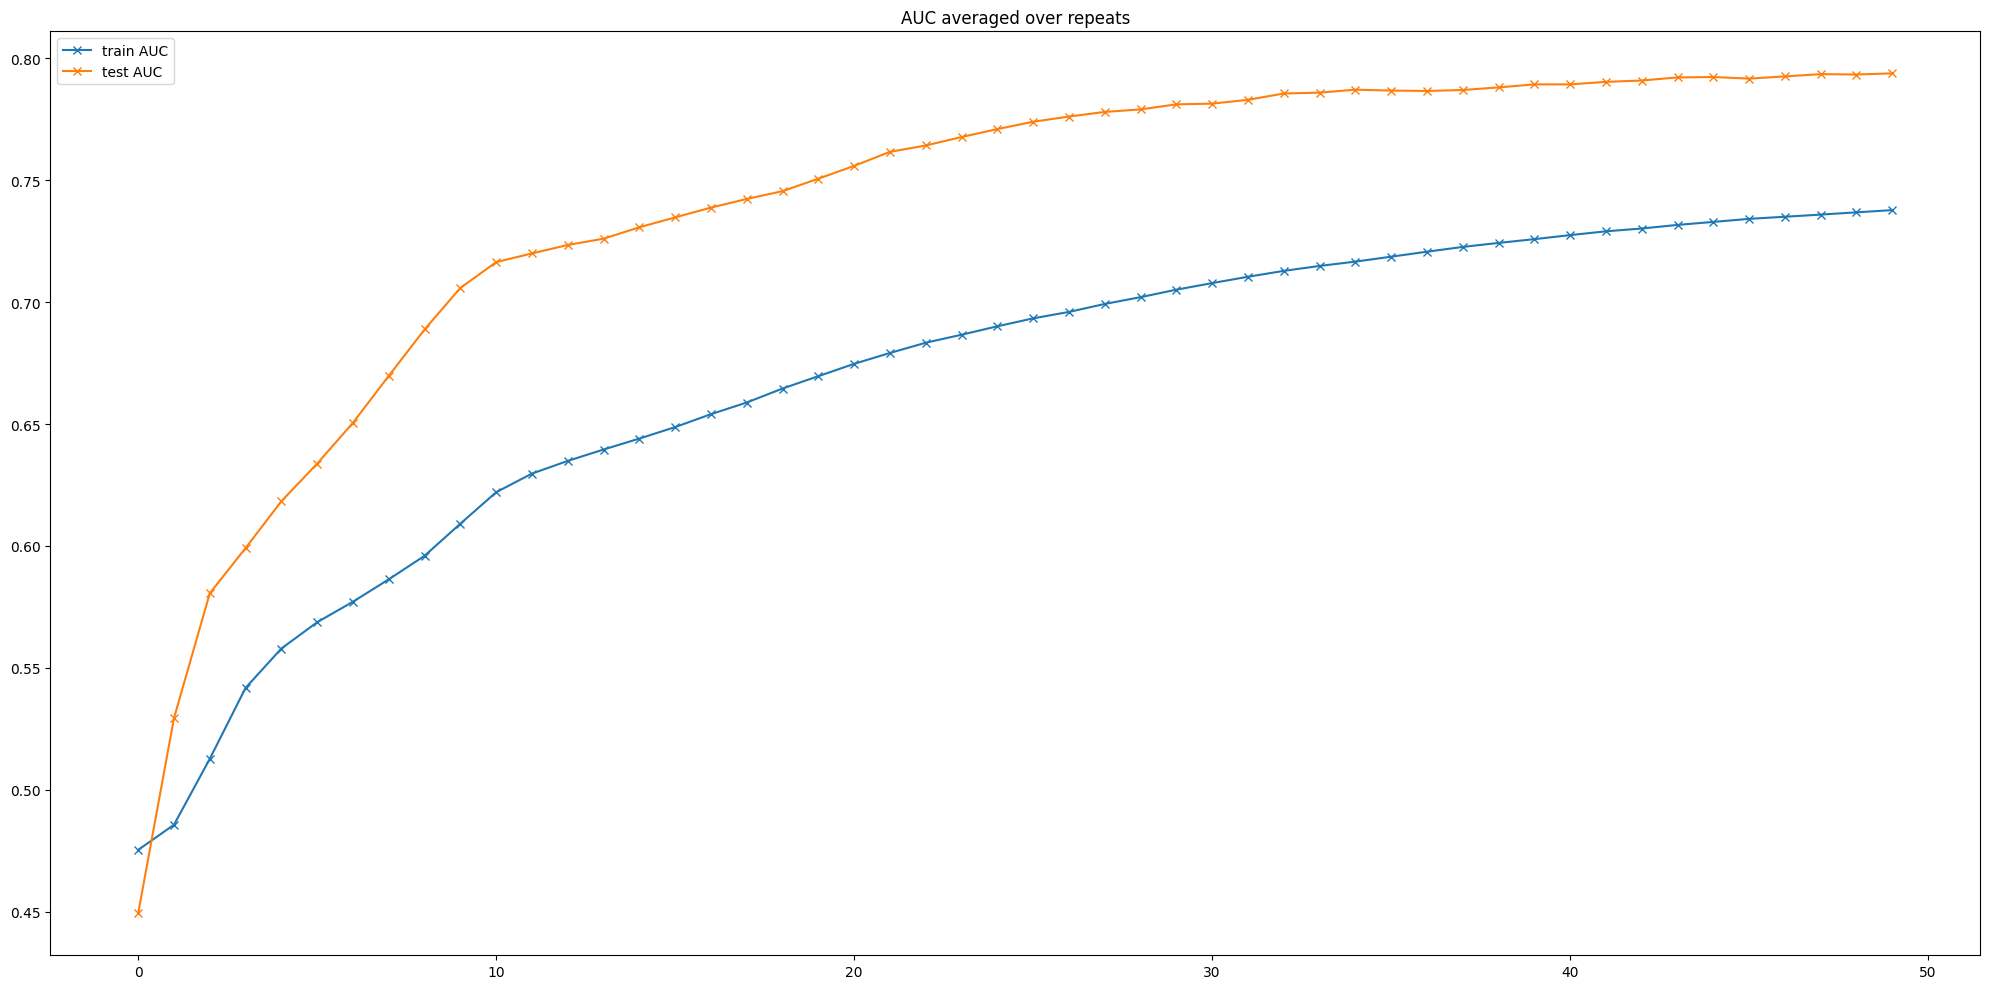

In [21]:
for key, val in avg_results.items():
    maxlen = max(len(i) for i in val)
    padded_arrs = np.array([np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan) for arr in val])
    val = np.nanmean(padded_arrs, axis = 0)
    t = key.replace(".csv", "").split("-")[0]
    plt.plot(val, label = f"{t} AUC", marker = "x")
    avg_results[t].append(np.array(val))

plt.title("AUC averaged over repeats")
plt.legend()
plt.show()

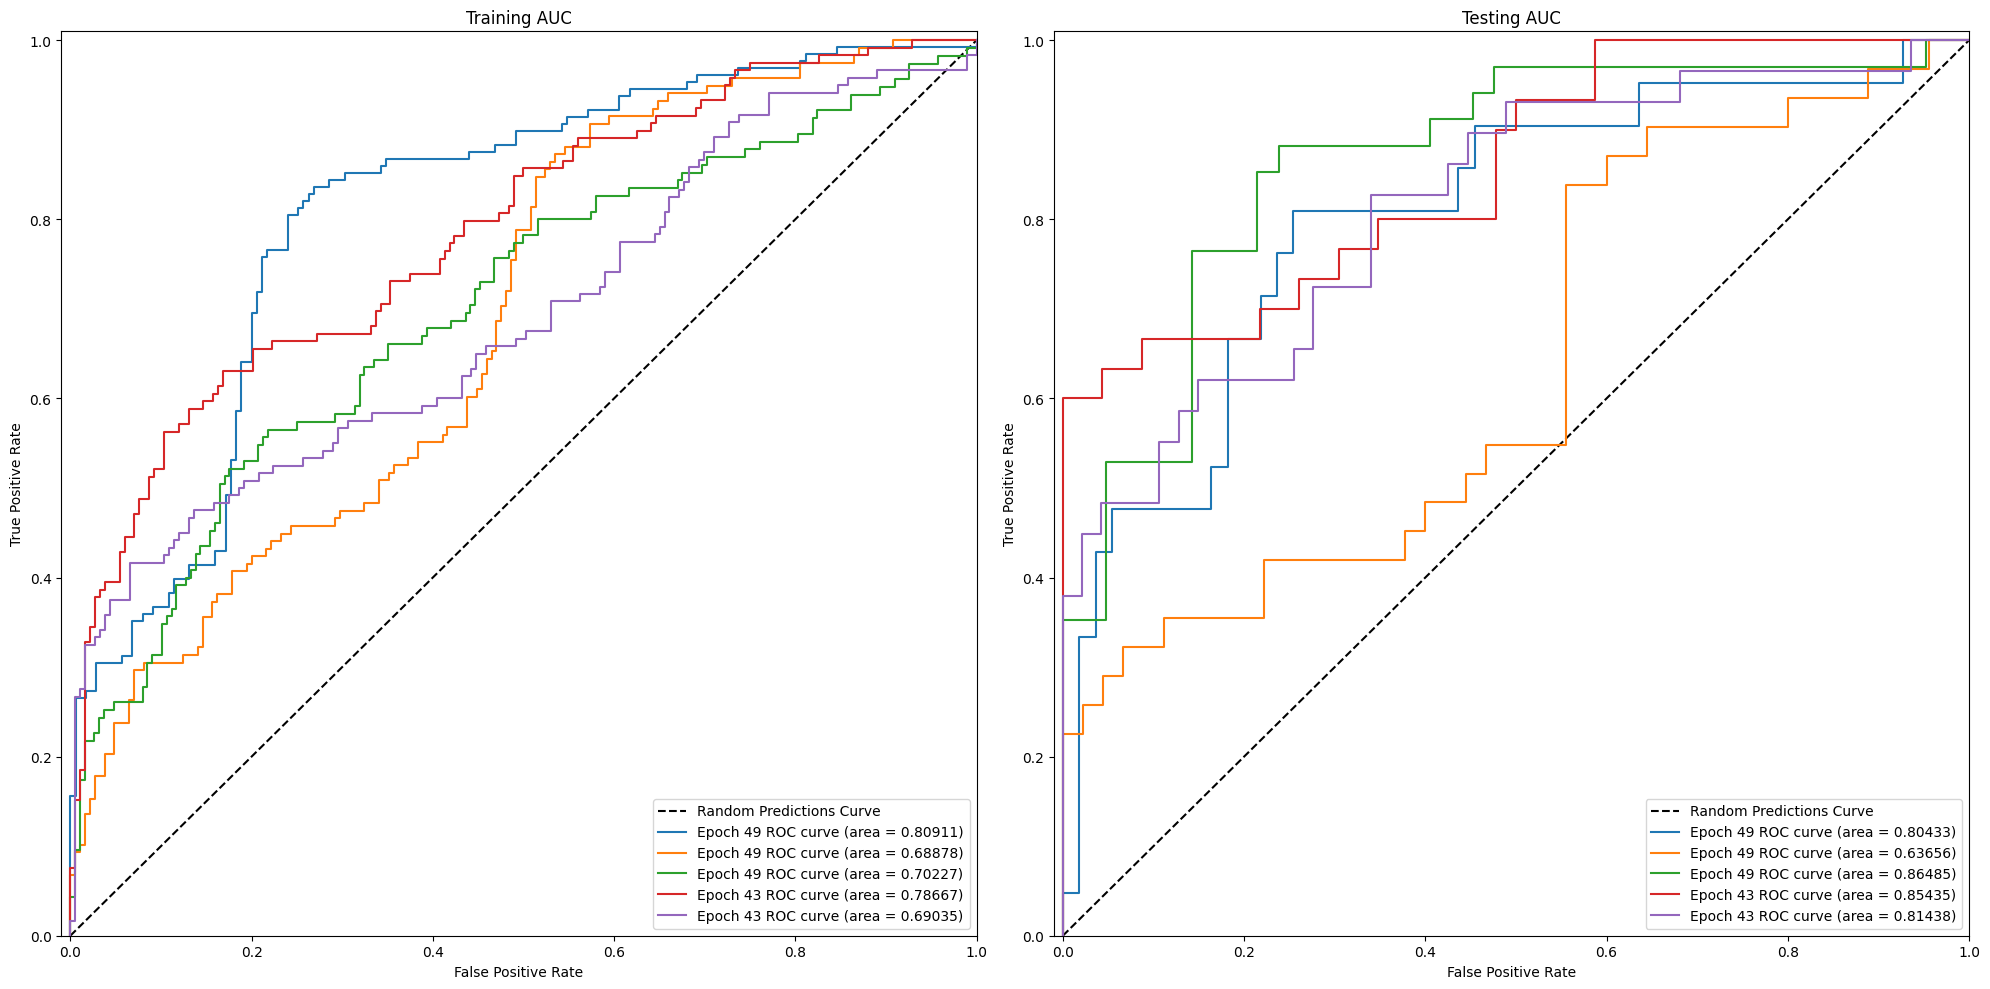

In [22]:
fig, axs = plt.subplots(ncols = 2)
aucs = {"train": [], "test": []}
axs[0].plot([0, 1], [0, 1], "k--", label = "Random Predictions Curve")
axs[1].plot([0, 1], [0, 1], "k--", label = "Random Predictions Curve")

for bestepoch, res in zip(bestepochs, results):
    epochwiseauc = res["epochwiseauc"]
    aucstats = res["aucstats"]
    for key in epochwiseauc.keys():
        fpr, tpr, thresholds = epochwiseauc[key][bestepoch]
        aucs["train" if "train" in key else "test"].append(aucstats[key][bestepoch])
        axs[0 if "train" in key else 1].plot(fpr, tpr, label = f"Epoch {bestepoch} ROC curve (area = {aucstats[key][bestepoch]:.5f})")
        axs[0 if "train" in key else 1].set_xlim([-0.01, 1])
        axs[0 if "train" in key else 1].set_ylim([0, 1.01])
        axs[0 if "train" in key else 1].set_xlabel("False Positive Rate")
        axs[0 if "train" in key else 1].set_ylabel("True Positive Rate")

axs[0].legend()
axs[1].legend()
axs[0].set_title("Training AUC")
axs[1].set_title("Testing AUC")
plt.show()

In [23]:
for key, item in aucs.items():
    print (f"{key}: {round(np.min(item), 3)} - {round(np.max(item), 3)} ($\mu$: {round(np.mean(item), 3)})")

train: 0.689 - 0.809 ($\mu$: 0.735)
test: 0.637 - 0.865 ($\mu$: 0.795)


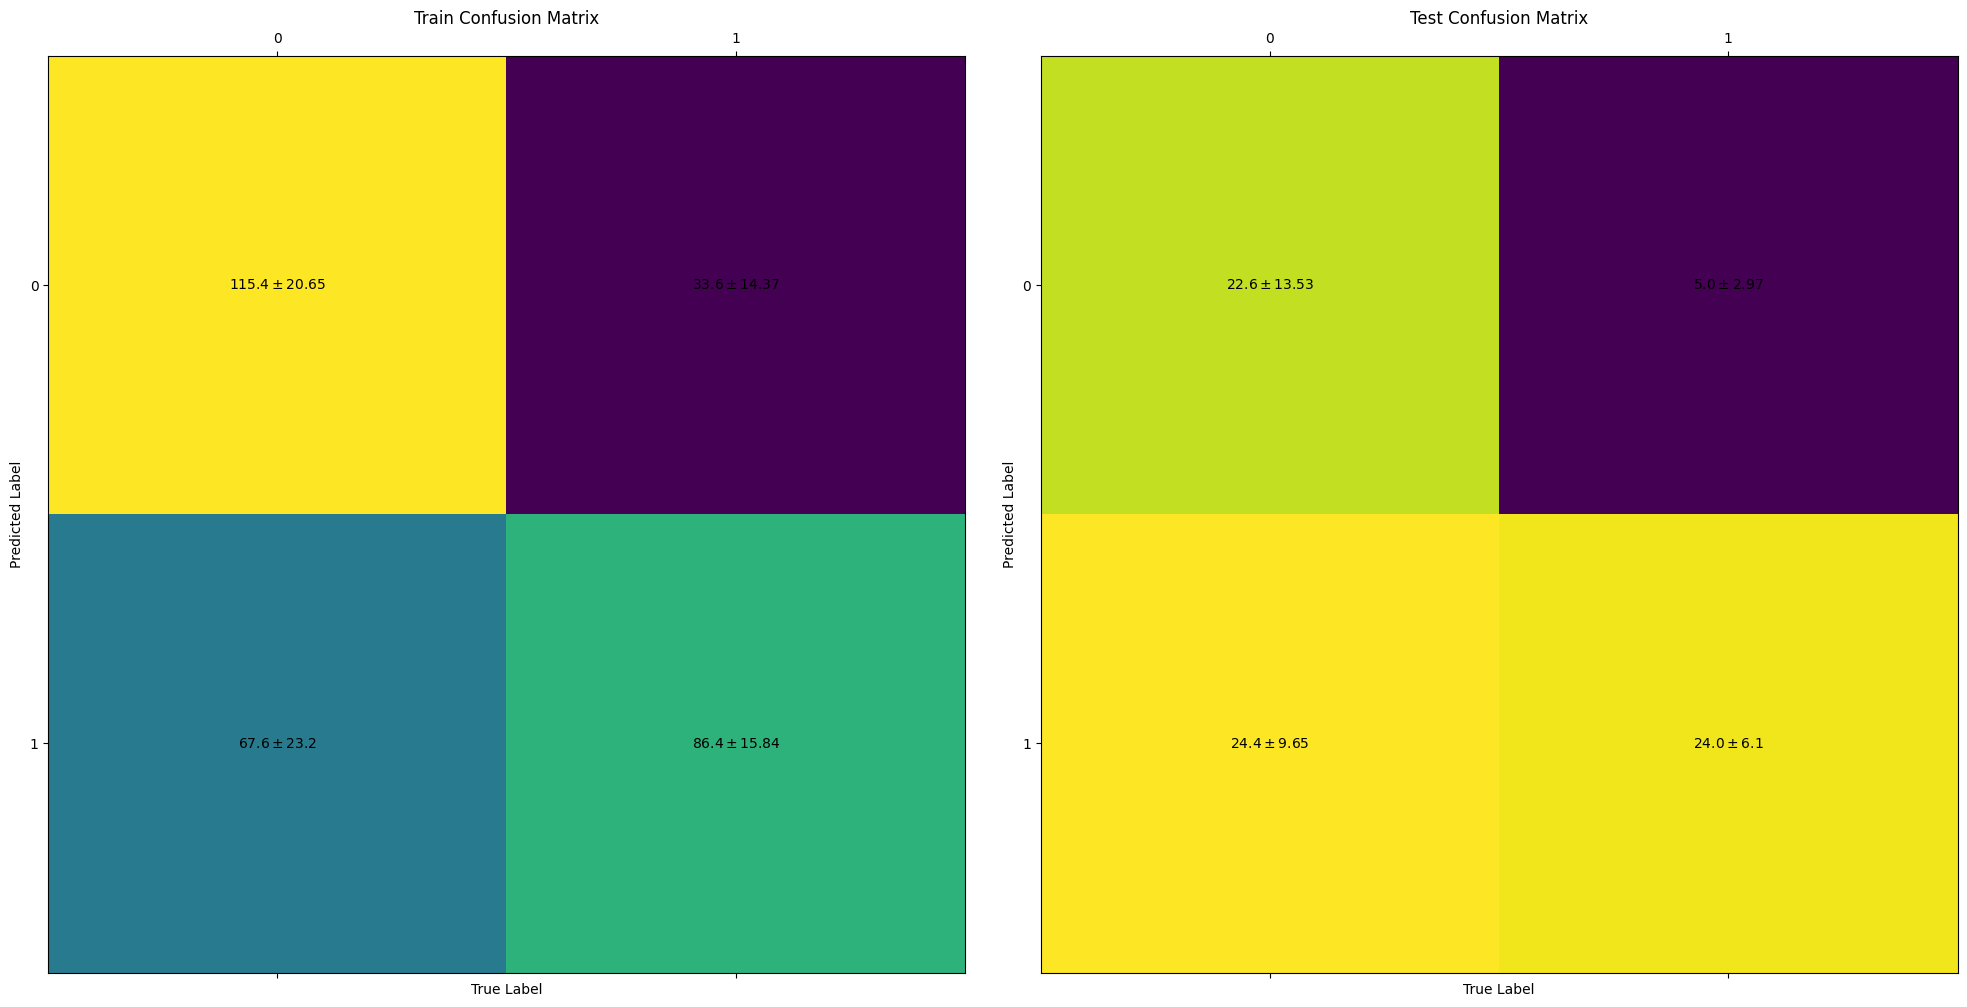

In [24]:
fig, axs = plt.subplots(ncols = 2)
cms = {"train": [], "test": []}

for foldername, bestepoch in zip(folders, bestepochs):
    dirs = Path.cwd() / foldername / f"Epoch {bestepoch}"
    data = {"train": None, "test": None}

    for i in list(dirs.glob("*-preds.csv")):
        info = i.name.replace("-preds.csv", "")
        df = pd.read_csv(i)
        data[info] = df
    
    for i, key in enumerate(list(data.keys())):
        conf = np.zeros((2, 2))
        df_ = data[key].copy()
        df_["preds"] = df_["preds"].map(lambda x: 1 if x >= 0.5 else 0)
        conf[0, 0] = ((df_["preds"] == 0) & (df_["actual"] == 0)).sum()
        conf[0, 1] = ((df_["preds"] == 0) & (df_["actual"] == 1)).sum()
        conf[1, 0] = ((df_["preds"] == 1) & (df_["actual"] == 0)).sum()
        conf[1, 1] = ((df_["preds"] == 1) & (df_["actual"] == 1)).sum()
        cms[key].append(conf)

confmean = {k: np.mean(i, axis = 0) for k, i in cms.items()}
confstd = {k: np.std(i, axis = 0) for k, i in cms.items()}
for i, key in enumerate(list(confmean.keys())):
    axs[i].matshow(confmean[key])
    for x in range(2):
        for y in range(2):
            axs[i].text(x, y, f"${round(confmean[key][y, x], 2)}\pm{round(confstd[key][y, x], 2)}$", va = "center", ha = "center")

    axs[i].set_xlabel("True Label")
    axs[i].set_ylabel("Predicted Label")
    axs[i].set_title(f"{key.title()} Confusion Matrix")